In [53]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [54]:
img = Image.open("/home/prajin/Desktop/Pyotrch/Image Classification /datasets/images/street.jpg").convert("RGB")

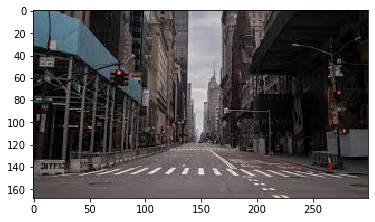

In [55]:
plt.imshow(img)

In [56]:
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms as tf

In [57]:
transforms = tf.Compose([tf.Resize(400),
                        tf.ToTensor()])

In [58]:
img_tensor = transforms(img)

In [59]:
img_tensor.shape

torch.Size([3, 400, 714])

In [12]:
sharpen_kernel = [[[[0, -1, 0]],
                  [[-1,5,-1]],
                  [[0,-1,0]]]]

In [60]:
horizontal_kernel =[[[[0, -1, 0]],
                  [[1,-4,1]],
                  [[0,1,0]]]]

In [61]:
conv_filter = torch.Tensor(horizontal_kernel)

In [62]:
conv_filter.shape
# 1 - output
# 3  - RGB 
# 1,3 - ht and width

torch.Size([1, 3, 1, 3])

In [63]:
# convolution in pytorch works in  batch so adding a batch dimensioin in our iamge

In [64]:
img_tensor = img_tensor.unsqueeze(0)

In [65]:
img_tensor.shape

torch.Size([1, 3, 400, 714])

In [66]:
conv_tensor = F.conv2d(img_tensor, conv_filter, padding =0 )

In [67]:
conv_tensor.shape
# 1- batch
# 1 - no of channels
# shape - decrae becuase of padding =0 

torch.Size([1, 1, 400, 712])

In [68]:
# getting rid of batch

In [69]:
conv_img = conv_tensor[0, :, :, :]

In [70]:
conv_img.shape
print(type(conv_img))

<class 'torch.Tensor'>


In [71]:
conv_img = conv_img.squeeze()
conv_img.shape

torch.Size([400, 712])

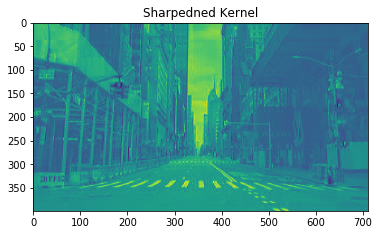

In [36]:
plt.title("Sharpedned Kernel")
plt.imshow(conv_img)

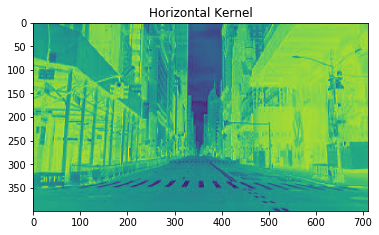

In [72]:
plt.title("Horizontal Kernel")
plt.imshow(conv_img)

In [73]:
#pooloing

In [74]:
pool = nn.MaxPool2d(2,2)

In [75]:
pool_tensor = pool(conv_tensor)

In [76]:
pool_tensor.shape

torch.Size([1, 1, 200, 356])

In [77]:
conv_tensor.shape

torch.Size([1, 1, 400, 712])